In [6]:
import numpy as np
from matplotlib import pyplot as plt
import librosa as lb

In [ ]:
import numpy as np
import librosa
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Load an audio file and extract its spectrogram
audio_file = '/Users/rajeshr/Desktop/Research/Datasets/Sample Sounds/piano.wav'
y, sr = librosa.load(audio_file, sr=22050)
spec = np.abs(librosa.stft(y))

# Compute pairwise distances between spectrogram frames
dist = pdist(spec.T)

noise = np.random.normal(scale=1e-6, size=dist.shape)
dist += noise

# Construct a graph using the distances as edge weights
g = nx.Graph(squareform(dist))

# Compute the Laplacian matrix of the graph
laplacian = nx.laplacian_matrix(g).toarray()

# Normalize the Laplacian matrix
d = np.diag(np.sum(laplacian, axis=1))
#print(d)
laplacian_norm = np.linalg.inv(d) @ laplacian

# Convert the adjacency matrix and normalized Laplacian matrix to Keras-compatible format
adj_matrix = np.asarray(nx.to_numpy_matrix(g))
laplacian_norm = laplacian_norm[np.newaxis, :, :]

# Use the adjacency matrix and normalized Laplacian matrix as inputs to the GCN
#model.fit([spec[np.newaxis, :, :, :], adj_matrix[np.newaxis, :, :], laplacian_norm], y_true)


In [9]:
import numpy as np
import librosa
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Load audio signal
y, sr = librosa.load('/Users/rajeshr/Desktop/Research/Datasets/Sample Sounds/piano.wav')
y = y[:25]

# Compute pairwise distances between time-domain samples
dist = pdist(y[:, np.newaxis], metric='euclidean')

# Add a small amount of noise to the pairwise distances
noise = np.random.normal(scale=1e-6, size=dist.shape)
dist += noise

# Construct a graph using the distances as edge weights
g = nx.Graph(squareform(dist))

# Remove isolated nodes from the graph
isolated_nodes = list(nx.isolates(g))
g.remove_nodes_from(isolated_nodes)

# Compute the Laplacian matrix of the graph
laplacian = nx.laplacian_matrix(g).toarray()


<class 'networkx.utils.decorators.argmap'> compilation 8:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


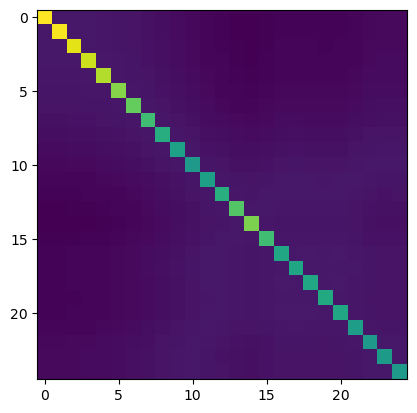

In [10]:
plt.imshow(laplacian)
plt.show()

In [13]:
import numpy as np
import librosa
import networkx as nx
from scipy.spatial.distance import pdist, squareform

# Load audio signal
y, sr = librosa.load('/Users/rajeshr/Desktop/Research/Datasets/Sample Sounds/piano.wav')
y = y[:25]

X = np.array([y, y])
y = X[0, :]
sr = 22050  # replace with your sampling rate

# Compute pairwise distances between time-domain samples
dist = pdist(y[:, np.newaxis], metric='euclidean')

# Add a small amount of noise to the pairwise distances
noise = np.random.normal(scale=1e-6, size=dist.shape)
dist += noise

# Construct a graph using the distances as edge weights
g = nx.Graph(squareform(dist))

# Remove isolated nodes from the graph
isolated_nodes = list(nx.isolates(g))
g.remove_nodes_from(isolated_nodes)

# Compute the Laplacian matrix of the graph
laplacian = nx.laplacian_matrix(g).toarray()

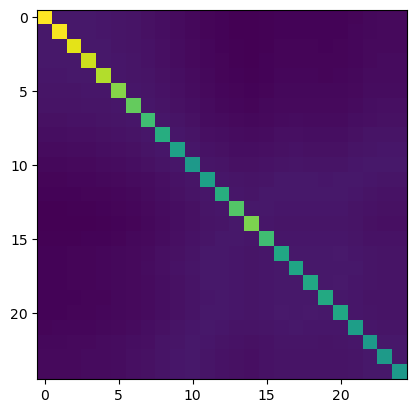

In [14]:
plt.imshow(laplacian)
plt.show()